In [1]:
import os
import sys
class NullWriter(object):
    def write(self, arg):
        pass
from HTSDKScope import Oscilloscope
#help(Oscilloscope)


def SetScope(Ch1VDivIndex=0,Ch2VDivIndex=0,TimeDivIndex=11): 
    VScale2 = VScale1= TScale = 1
    
#{0: ('20 mV/Div', 0.02), 1: ('50 mV/Div', 0.05), 2: ('100 mV/Div', 0.1), 
#3: ('200 mV/Div', 0.2), 4: ('500 mV/Div', 0.5), 5: ('1 V/Div', 1.0), 
#6: ('2 V/Div', 2.0), 7: ('5 V/Div', 5.0)}    
    if(Ch1VDivIndex==0): VScale1 = 0.02/32
    elif(Ch1VDivIndex==1): VScale1 = 0.05/32
    elif(Ch1VDivIndex==2): VScale1 = 0.1/32
    elif(Ch1VDivIndex==3): VScale1 = 0.2/32
    elif(Ch1VDivIndex==4): VScale1 = 0.5/32
    elif(Ch1VDivIndex==5): VScale1 = 1.0/32
    elif(Ch1VDivIndex==6): VScale1 = 2.0/32
    else: VScale1 = 5.0/32
        
    if(Ch1VDivIndex==0): VScale2 = 0.02/32 
    elif(Ch1VDivIndex==1): VScale2 = 0.05/32
    elif(Ch1VDivIndex==2): VScale2 = 0.1/32
    elif(Ch1VDivIndex==3): VScale2 = 0.2/32
    elif(Ch1VDivIndex==4): VScale2 = 0.5/32
    elif(Ch1VDivIndex==5): VScale2 = 1.0/32
    elif(Ch1VDivIndex==6): VScale2 = 2.0/32
    else: VScale2 = 5.0/32
# Need to return VScale2 and TScale also eventually          
# TimeDivIndex 
#{0: ('48 MSa/s', 48000000.0), 1: ('48 MSa/s', 48000000.0), 2: ('48 MSa/s', 48000000.0), 3: ('48 MSa/s', 48000000.0),
#4: ('48 MSa/s', 48000000.0), 5: ('48 MSa/s', 48000000.0), 6: ('48 MSa/s', 48000000.0), 7: ('48 MSa/s', 48000000.0), 
#8: ('48 MSa/s', 48000000.0), 9: ('48 MSa/s', 48000000.0), 10: ('48 MSa/s', 48000000.0), 
#11: ('16 MSa/s', 16000000.0), 12: ('8 MSa/s', 8000000.0), 13: ('4 MSa/s', 4000000.0), 
#14: ('1 MSa/s', 1000000.0), 15: ('1 MSa/s', 1000000.0), 16: ('1 MSa/s', 1000000.0), 
#17: ('1 MSa/s', 1000000.0), 18: ('1 MSa/s', 1000000.0), 19: ('1 MSa/s', 1000000.0), 20: ('1 MSa/s', 1000000.0), 
#21: ('1 MSa/s', 1000000.0), 22: ('1 MSa/s', 1000000.0), 23: ('1 MSa/s', 1000000.0), 24: ('1 MSa/s', 1000000.0), 
#25: ('500 KSa/s', 500000.0), 26: ('200 KSa/s', 200000.0), 27: ('100 KSa/s', 100000.0)}
    if(Ch1VDivIndex==0): TScale = 2e4
    elif(Ch1VDivIndex==1): TScale = 2e4*3.
    else: TScale = 2e4*3.

    scope0 = Oscilloscope(scopeid=0)
    scope0.set_voltage_division(1, Ch1VDivIndex)
    scope0.set_voltage_division(2, Ch2VDivIndex)
    scope0.set_sampling_rate(TimeDivIndex)
    import sys

    nullwrite = NullWriter()
    oldstdout = sys.stdout
    sys.stdout = nullwrite # disable output
    scope0.setup_dso_cal_level() 
    sys.stdout = oldstdout # enable output 
    return scope0, TScale, VScale1, VScale2


Waiting for Trigger


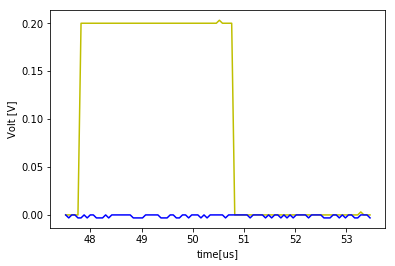

In [3]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
scope0 = Oscilloscope(scopeid=0)


scope0,TScale,VScale1, VScale2=SetScope(2,2,27)
#TenXProbe=True
#if(TenXProbe): 
#    VScale1=VScale1*10
#    VScale2=VScale2*10

numSampRead = 2000
numSampSave = 100/2
Ch1Trig = 0.01
Triggered = False

print "Waiting for Trigger"
while(Triggered == False):
    rawData = scope0.read_data_from_scope(data_points=numSampRead)
    ch1Data = np.asarray(rawData[0])*VScale1
    ch2Data = np.asarray(rawData[1])*VScale2
    timeData = np.asarray(rawData[2])*TScale# conversion to microsec
    if(ch1Data.max() > Ch1Trig):
        Triggered = True
        ch1Max = np.argmax(ch1Data)
        if(ch1Max+numSampSave > numSampRead): ch1Max = numSampRead-numSampSave
        if(ch1Max-numSampSave < 0): ch1Max = numSampSave   
        plt.plot(timeData[ch1Max-numSampSave:ch1Max+numSampSave], ch1Data[ch1Max-numSampSave:ch1Max+numSampSave], 'y-',
                 timeData[ch1Max-numSampSave:ch1Max+numSampSave], ch2Data[ch1Max-numSampSave:ch1Max+numSampSave], 'b-')
        plt.xlabel("time[us]")
        plt.ylabel("Volt [V]")
        plt.show()

